In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
ce_shp = gpd.read_file("../shapefiles/CE_Municipios_2020.shp")

In [4]:
ce_crs = ce_shp.crs
#ce_crs

In [5]:
ce_shp.to_crs(epsg=3395, inplace=True)

In [6]:
ce_shp.plot();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
ce_shp[ce_shp['NM_MUN'] == 'Ibicuitinga'].plot();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
ce_shp[ce_shp['NM_MUN'] == 'Ibicuitinga']

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
73,2305332,Ibicuitinga,CE,423.856,"POLYGON ((-4281484.170 -539566.449, -4281463.5..."


In [7]:
ce_shp[ce_shp['NM_MUN'] == 'Redenção'].plot();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
redencao_centroid = ce_shp[ce_shp['NM_MUN'] == 'Redenção'].centroid

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ce_shp[ce_shp['NM_MUN'] == 'Redenção'].plot(ax=ax, color='white', edgecolor='black')
redencao_centroid.plot(ax=ax, marker='o', color='red', markersize=5);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
redencao_buffer = redencao_centroid.buffer(60_000)

In [11]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ce_shp.plot(ax=ax, color='white', edgecolor='black')
redencao_centroid.plot(ax=ax, marker='o', color='red', markersize=5)
redencao_buffer.plot(ax=ax, edgecolors=("red",), alpha=.4);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
redencao_buffer_gdf = gpd.GeoDataFrame({'geometry': redencao_buffer})
ce_intersection = gpd.overlay(ce_shp, redencao_buffer_gdf, how='intersection')

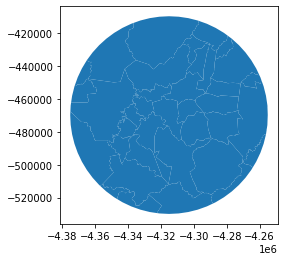

In [13]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ce_intersection.plot(ax=ax);

In [14]:
ce_intersection

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2300150,Acarape,CE,130.002,"POLYGON ((-4302837.214 -460172.544, -4302789.4..."
1,2300903,Apuiarés,CE,543.980,"POLYGON ((-4365020.878 -436767.088, -4363066.5..."
2,2301000,Aquiraz,CE,480.236,"POLYGON ((-4260154.923 -445699.862, -4260167.6..."
3,2301208,Aracoiaba,CE,643.988,"POLYGON ((-4315270.630 -476590.059, -4315212.4..."
4,2301406,Aratuba,CE,119.758,"POLYGON ((-4345495.378 -482594.572, -4345376.3..."
5,2301950,Barreira,CE,260.003,"POLYGON ((-4293645.527 -468768.475, -4293284.3..."
6,2302107,Baturité,CE,314.075,"POLYGON ((-4324578.103 -468213.553, -4324528.1..."
7,2302206,Beberibe,CE,1596.751,"MULTIPOLYGON (((-4264170.489 -501643.597, -426..."
8,2302800,Canindé,CE,3032.390,"POLYGON ((-4374901.194 -467752.363, -4374150.4..."
9,2302909,Capistrano,CE,226.549,"POLYGON ((-4335332.578 -481493.408, -4335322.6..."


In [15]:
ba_shp = gpd.read_file("../shapefiles/BA_Municipios_2020.shp")

In [16]:
ba_shp.to_crs(epsg=3395, inplace=True)

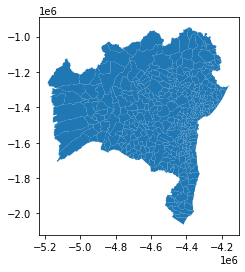

In [17]:
ba_shp.plot();

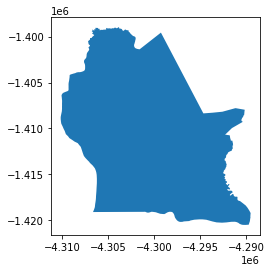

In [18]:
ba_shp[ba_shp['NM_MUN'] == 'São Francisco do Conde'].plot();

In [19]:
sfc_centroid = ba_shp[ba_shp['NM_MUN'] == 'São Francisco do Conde'].centroid

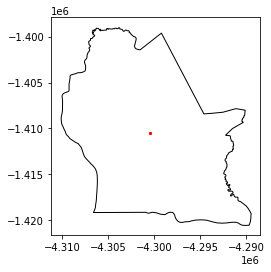

In [20]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ba_shp[ba_shp['NM_MUN'] == 'São Francisco do Conde'].plot(ax=ax, color='white', edgecolor='black')
sfc_centroid.plot(ax=ax, marker='o', color='red', markersize=5);

In [21]:
sfc_buffer = sfc_centroid.buffer(60_000)

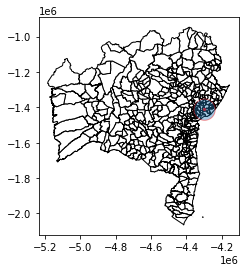

In [22]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ba_shp.plot(ax=ax, color='white', edgecolor='black')
sfc_centroid.plot(ax=ax, marker='o', color='red', markersize=5)
sfc_buffer.plot(ax=ax, edgecolors=("red",), alpha=.4);

In [23]:
sfc_buffer_gdf = gpd.GeoDataFrame({'geometry': sfc_buffer})
ba_intersection = gpd.overlay(ba_shp, sfc_buffer_gdf, how='intersection')

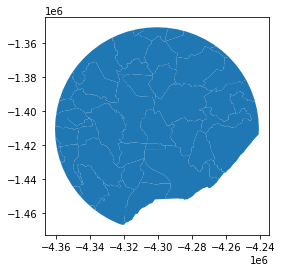

In [24]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ba_intersection.plot(ax=ax);

In [25]:
ba_intersection

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2900702,Alagoinhas,BA,707.835,"POLYGON ((-4266052.268 -1361449.573, -4266100...."
1,2901106,Amélia Rodrigues,BA,166.872,"POLYGON ((-4305308.127 -1384619.403, -4305284...."
2,2901700,Antônio Cardoso,BA,293.530,"POLYGON ((-4350375.885 -1377178.968, -4350372...."
3,2902054,Araçás,BA,474.577,"POLYGON ((-4258214.236 -1367956.624, -4260516...."
4,2902203,Aramari,BA,368.947,"POLYGON ((-4284806.537 -1352667.939, -4284745...."
5,2902302,Aratuípe,BA,174.012,"POLYGON ((-4340196.686 -1455410.983, -4340190...."
6,2904852,Cabaceiras do Paraguaçu,BA,222.026,"POLYGON ((-4349566.848 -1394110.193, -4349559...."
7,2904902,Cachoeira,BA,394.894,"POLYGON ((-4328851.737 -1395787.451, -4328820...."
8,2905701,Camaçari,BA,785.421,"POLYGON ((-4251092.248 -1388657.921, -4251083...."
9,2906501,Candeias,BA,251.808,"POLYGON ((-4283903.469 -1403861.170, -4283912...."
